***Inserting data to customers table***

In [53]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# import pandas as pd
# import mysql.connector as cor

# db_config = {
#     'user': 'root',
#     'password': 'Kash@123',
#     'host': 'localhost',
#     'database': 'ecom_analysis'
# }

# conn = cor.connect(**db_config)
# cursor = conn.cursor()

# # Customer table
# df = pd.read_csv('customer.csv')

# insert_query = """
# INSERT INTO customer (customer_id,name,city,email,phone_no,address,pin_code)
# VALUES (%s, %s, %s, %s, %s, %s, %s)
# """

# for index, row in df.iterrows():
#     cursor.execute(insert_query, tuple(row))

# conn.commit()

# cursor.close()
# conn.close()


***Inserting data to Products table***

In [55]:
# import pandas as pd
# import mysql.connector as cor

# db_config = {
#     'user': 'root',
#     'password': 'Kash@123',
#     'host': 'localhost',
#     'database': 'ecom_analysis'
# }

# conn = cor.connect(**db_config)
# cursor = conn.cursor()

# # Customer table
# df = pd.read_csv('products.csv')

# insert_query = """
# INSERT INTO product (product_id,product_name,category,sub_category,original_price,selling_price,stock)
# VALUES (%s, %s, %s, %s, %s, %s, %s)
# """

# for index, row in df.iterrows():
#     cursor.execute(insert_query, tuple(row))

# conn.commit()

# cursor.close()
# conn.close()

***Inserting data into Orders table***

In [56]:
# import pandas as pd
# import mysql.connector as cor

# db_config = {
#     'user': 'root',
#     'password': 'Kash@123',
#     'host': 'localhost',
#     'database': 'ecom_analysis'
# }

# conn = cor.connect(**db_config)
# cursor = conn.cursor()

# # Customer table
# df = pd.read_csv('Order.csv')

# insert_query = """
# INSERT INTO order_details (order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status)
# VALUES (%s, %s, %s, %s, %s, %s, %s,%s)
# """

# for index, row in df.iterrows():
#     cursor.execute(insert_query, tuple(row))

# conn.commit()

# cursor.close()
# conn.close()

In [57]:
import mysql.connector
import pandas as pd

connection = mysql.connector.connect(
    user = 'root',
    password = 'root',
    host = 'localhost',
    database = 'ecom_analysis'
)
cursor = connection.cursor()


In [58]:
cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,1,John Doe,New York,john.doe@example.com,1234567890,"123 Main St, Apt 4B",10001
1,2,Jane Smith,Los Angeles,jane.smith@example.com,0987654321,"456 Elm St, Apt 12C",90001
2,3,Alice Johnson,Chicago,alice.johnson@example.com,1122334455,"789 Oak St, Apt 3A",60601
3,4,Bob Brown,Houston,bob.brown@example.com,2233445566,"101 Pine St, Apt 8D",77001
4,5,Charlie Davis,Phoenix,charlie.davis@example.com,3344556677,"202 Maple St, Apt 5E",85001


In [59]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,1,Smartphone A1,Electronics,Mobile,50000.00,47000.00,100
1,2,Smartphone B2,Electronics,Mobile,60000.00,55000.00,80
2,3,Laptop C3,Electronics,Laptop,75000.00,70000.00,50
3,4,Laptop D4,Electronics,Laptop,85000.00,80000.00,60
4,5,Smartwatch E5,Electronics,Wearable,20000.00,18000.00,120


In [60]:
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,1,1,2,94000.00,Credit Card,2024-08-01,Shipped
1,2,2,3,1,70000.00,Debit Card,2024-08-02,Delivered
2,3,3,5,3,54000.00,PayPal,2024-08-03,Pending
3,4,4,7,1,4500.00,Cash on Delivery,2024-08-04,Cancelled
4,5,5,9,1,60000.00,Credit Card,2024-08-05,Shipped


In [61]:
import matplotlib.pyplot as plt

***Total number of customers by city***

In [62]:
import pandas as pd
import mysql.connector as cor
import matplotlib.pyplot as plt

# Database configuration
conn = cor.connect(
    user = 'root',
    password = 'root',
    host = 'localhost',
    database = 'ecom_analysis'
)

C:\Users\khush\AppData\Local\Temp\ipykernel_3888\1974824992.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


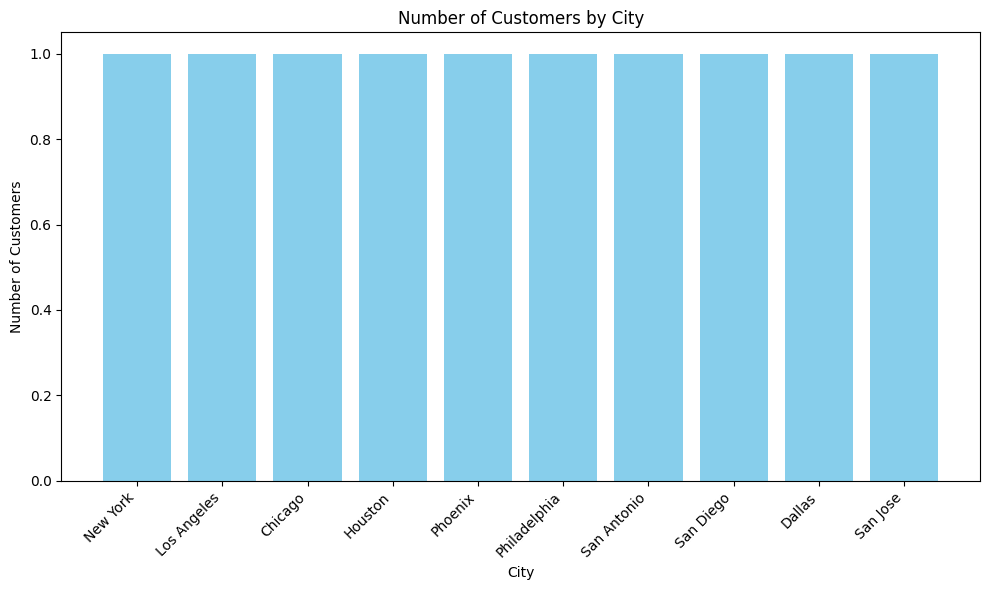

In [63]:
query = """
SELECT city, COUNT(*) AS total_customers
FROM customer
GROUP BY city
ORDER BY total_customers DESC
"""

# Fetch the data into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['city'], df['total_customers'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\1929469542.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


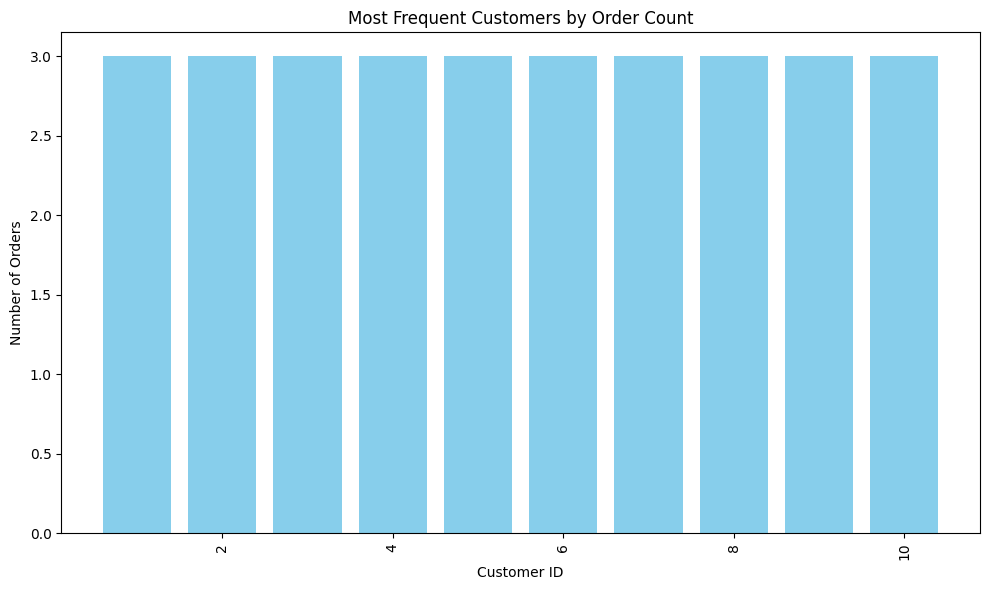

In [64]:
query = """
SELECT customer_id, COUNT(*) AS order_count
FROM order_details
GROUP BY customer_id
ORDER BY order_count DESC
"""

# Fetch the data into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['customer_id'], df['order_count'], color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Most Frequent Customers by Order Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\3985206664.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


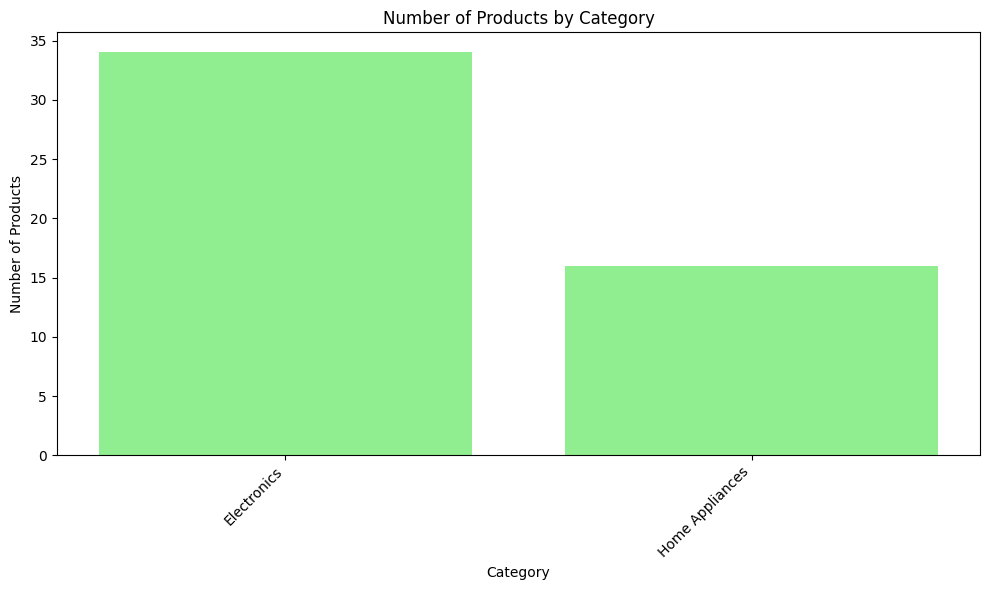

In [65]:
query = """
SELECT category, COUNT(*) AS total_products
FROM product
GROUP BY category
ORDER BY total_products DESC
"""

# Fetch the data into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['category'], df['total_products'], color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Number of Products by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2449423724.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


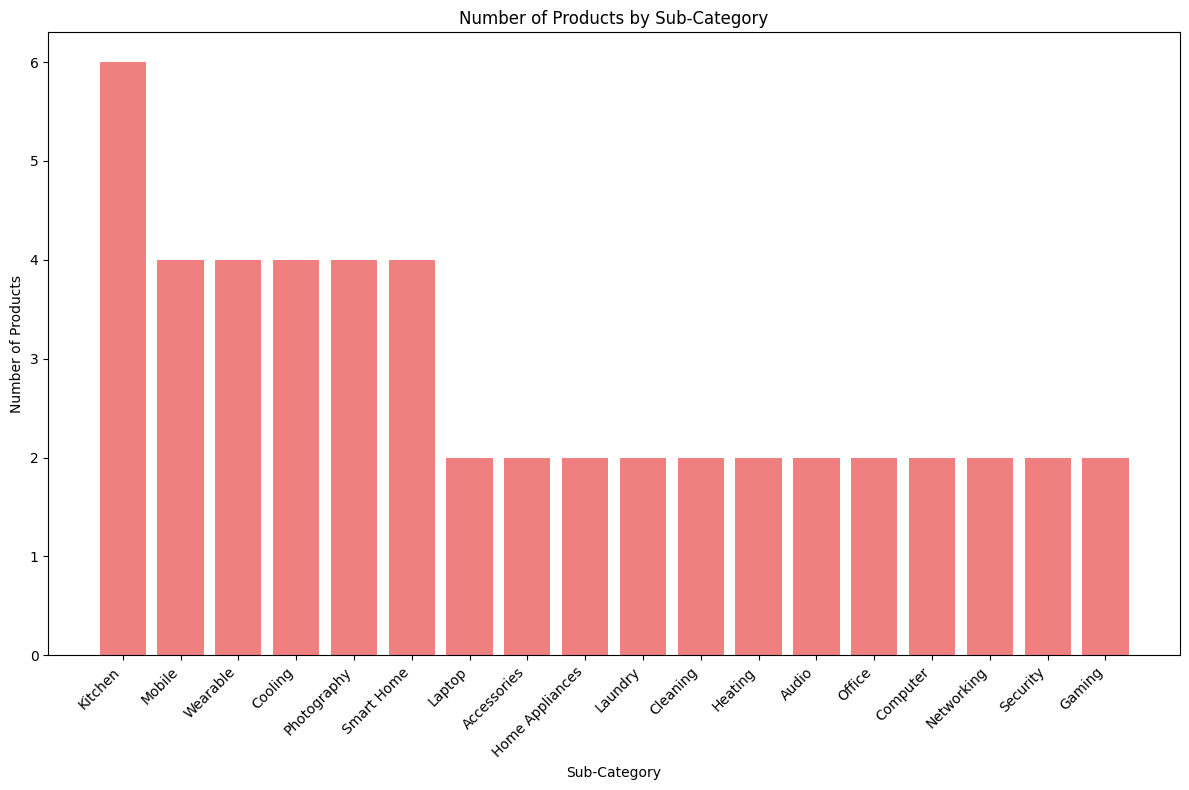

In [66]:
query = """
SELECT sub_category, COUNT(*) AS total_products
FROM product
GROUP BY sub_category
ORDER BY total_products DESC
"""

# Fetch the data into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(df['sub_category'], df['total_products'], color='lightcoral')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.title('Number of Products by Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\729180706.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_low_stock = pd.read_sql(query, conn)


    product_id         product_name  stock
0           22  Air Conditioner V22     23
1           21  Air Conditioner U21     25
2           24           Heater X24     28
3           50            Drone X50     28
4            9        Television I9     30
5           23           Heater W23     30
6           49            Drone W49     30
7           10       Television J10     35
8           12     Refrigerator L12     38
9           48   Gaming Console V48     38
10          11     Refrigerator K11     40
11          47   Gaming Console U47     40
12          14  Washing Machine N14     42
13          13  Washing Machine M13     45
14          30           Camera D30     48


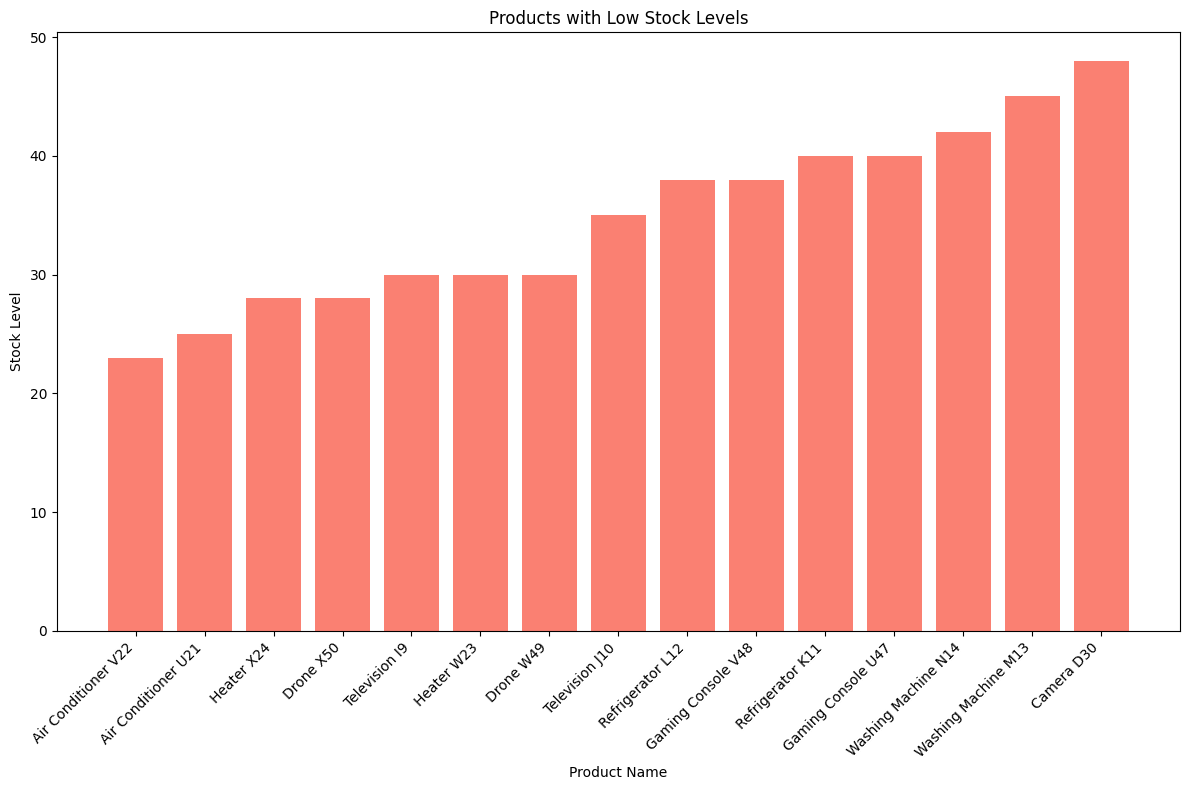

In [67]:
low_stock_threshold = 50 

query = f"""
SELECT product_id, product_name, stock
FROM product
WHERE stock < {low_stock_threshold}
ORDER BY stock ASC
"""

# Fetch the data into a DataFrame
df_low_stock = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Display the results
print(df_low_stock)

# Optionally, you can also plot the results
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(df_low_stock['product_name'], df_low_stock['stock'], color='salmon')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\3889995955.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_price_stats = pd.read_sql(query, conn)


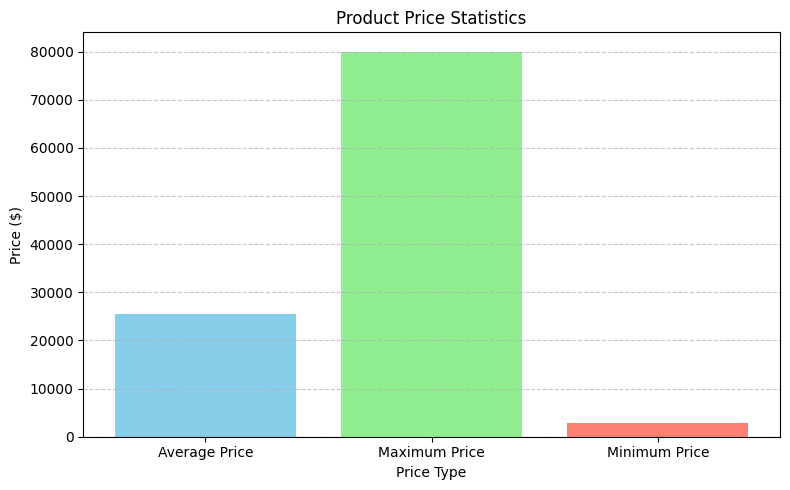

In [68]:
query = """
SELECT 
    AVG(selling_price) AS average_price,
    MAX(selling_price) AS maximum_price,
    MIN(selling_price) AS minimum_price
FROM product
"""

# Fetch the data into a DataFrame
df_price_stats = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Extract values for plotting
average_price = df_price_stats['average_price'][0]
maximum_price = df_price_stats['maximum_price'][0]
minimum_price = df_price_stats['minimum_price'][0]

# Data for plotting
labels = ['Average Price', 'Maximum Price', 'Minimum Price']
values = [average_price, maximum_price, minimum_price]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Price Type')
plt.ylabel('Price ($)')
plt.title('Product Price Statistics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2192052183.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_products = pd.read_sql(query, conn)


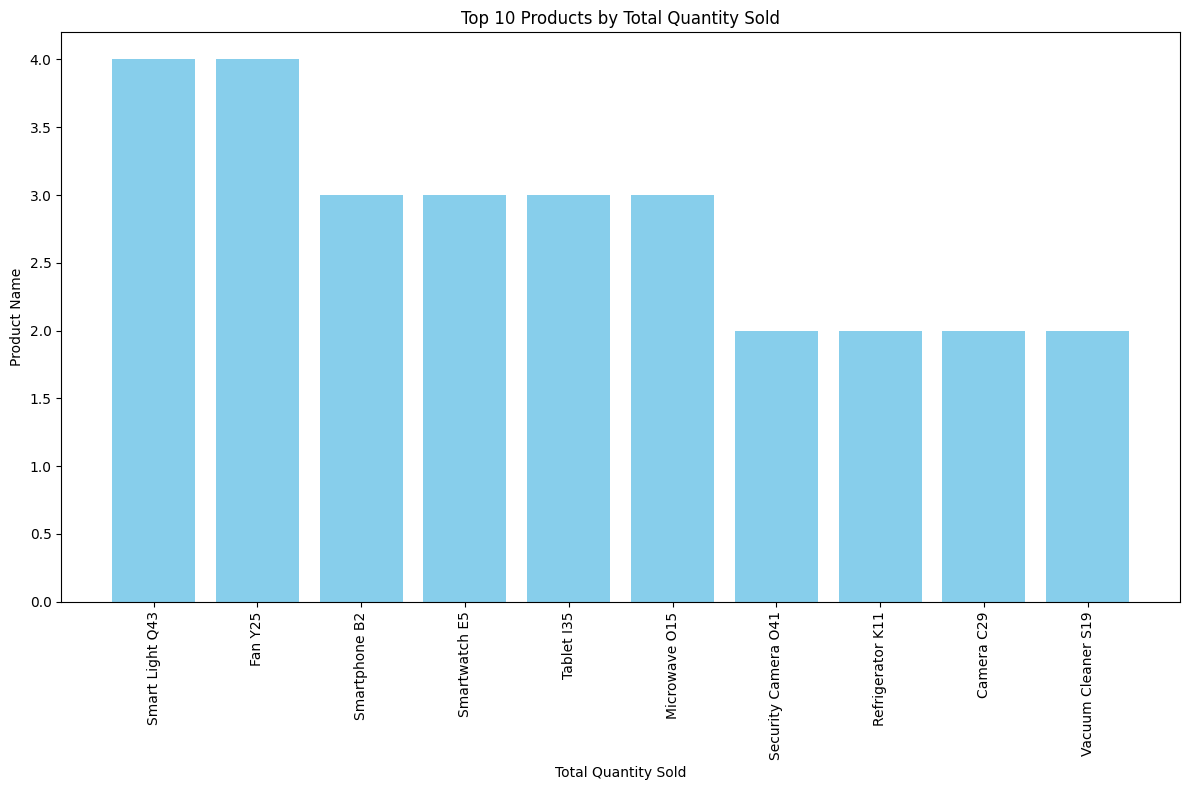

In [69]:
query = """
SELECT 
    p.product_id,
    p.product_name,
    SUM(od.quantity) AS total_quantity
FROM 
    order_details od
JOIN 
    product p ON od.product_id = p.product_id
GROUP BY 
    p.product_id, p.product_name
ORDER BY 
    total_quantity DESC
LIMIT 10;
"""

# Fetch the data into a DataFrame
df_top_products = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Plot
plt.figure(figsize=(12, 8))
plt.bar(df_top_products['product_name'], df_top_products['total_quantity'], color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.xticks(rotation = 90)
plt.title('Top 10 Products by Total Quantity Sold')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\4002616202.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_status_distribution = pd.read_sql(query, conn)


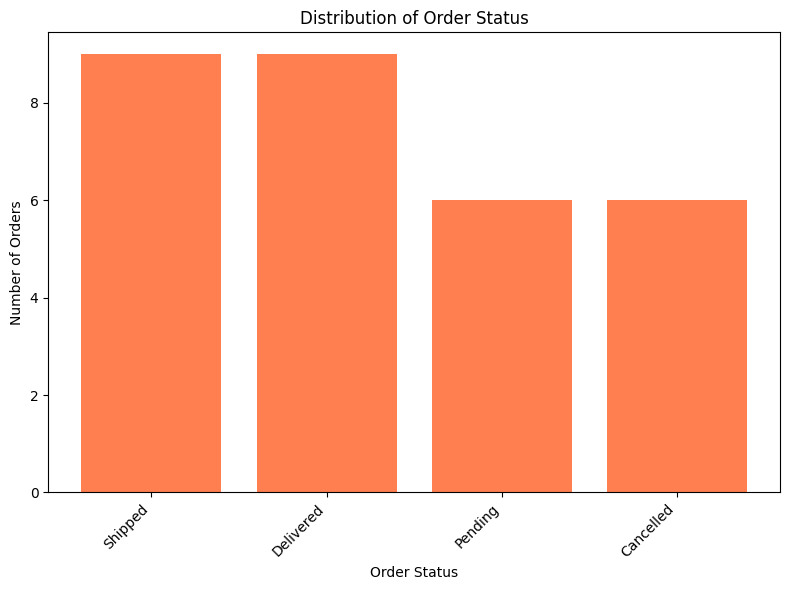

In [70]:
query = """
SELECT 
    order_status,
    COUNT(*) AS count
FROM 
    order_details
GROUP BY 
    order_status;
"""

# Fetch the data into a DataFrame
df_status_distribution = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(df_status_distribution['order_status'], df_status_distribution['count'], color='coral')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2242410479.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_popular_products = pd.read_sql(query, conn)
C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2242410479.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product_names = pd.read_sql(product_names_query, conn)


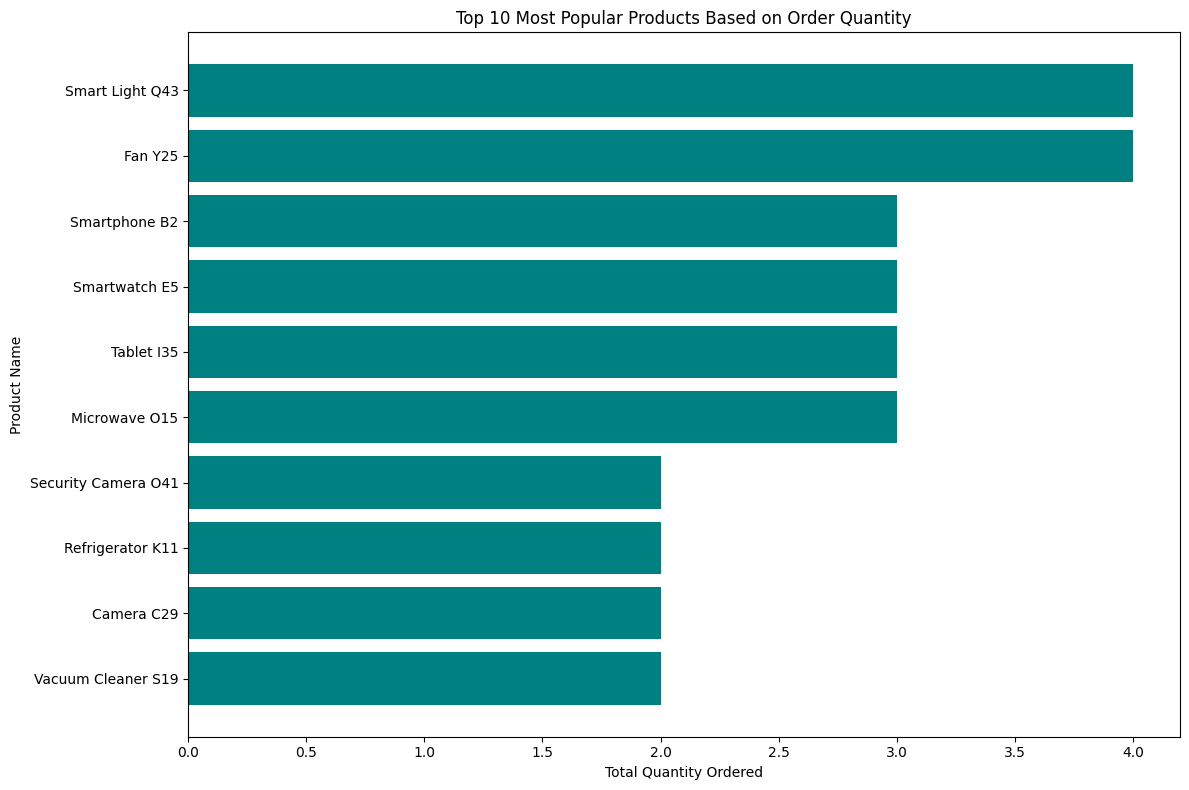

In [71]:
query = """
SELECT 
    product_id,
    SUM(quantity) AS total_quantity
FROM 
    order_details
GROUP BY 
    product_id
ORDER BY 
    total_quantity DESC
LIMIT 10;
"""

# Fetch the data into a DataFrame
df_popular_products = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Load product names for better readability (assuming a products table exists)
product_names_query = """
SELECT
    product_id,
    product_name
FROM
    product;
"""

# Fetch the product names
df_product_names = pd.read_sql(product_names_query, conn)

# Merge product names with popular products
df_popular_products = df_popular_products.merge(df_product_names, on='product_id')

# Plot
plt.figure(figsize=(12, 8))
plt.barh(df_popular_products['product_name'], df_popular_products['total_quantity'], color='teal')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Top 10 Most Popular Products Based on Order Quantity')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest quantities on top
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\1543233495.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenue = pd.read_sql(query, conn)
C:\Users\khush\AppData\Local\Temp\ipykernel_3888\1543233495.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product_names = pd.read_sql(product_names_query, conn)


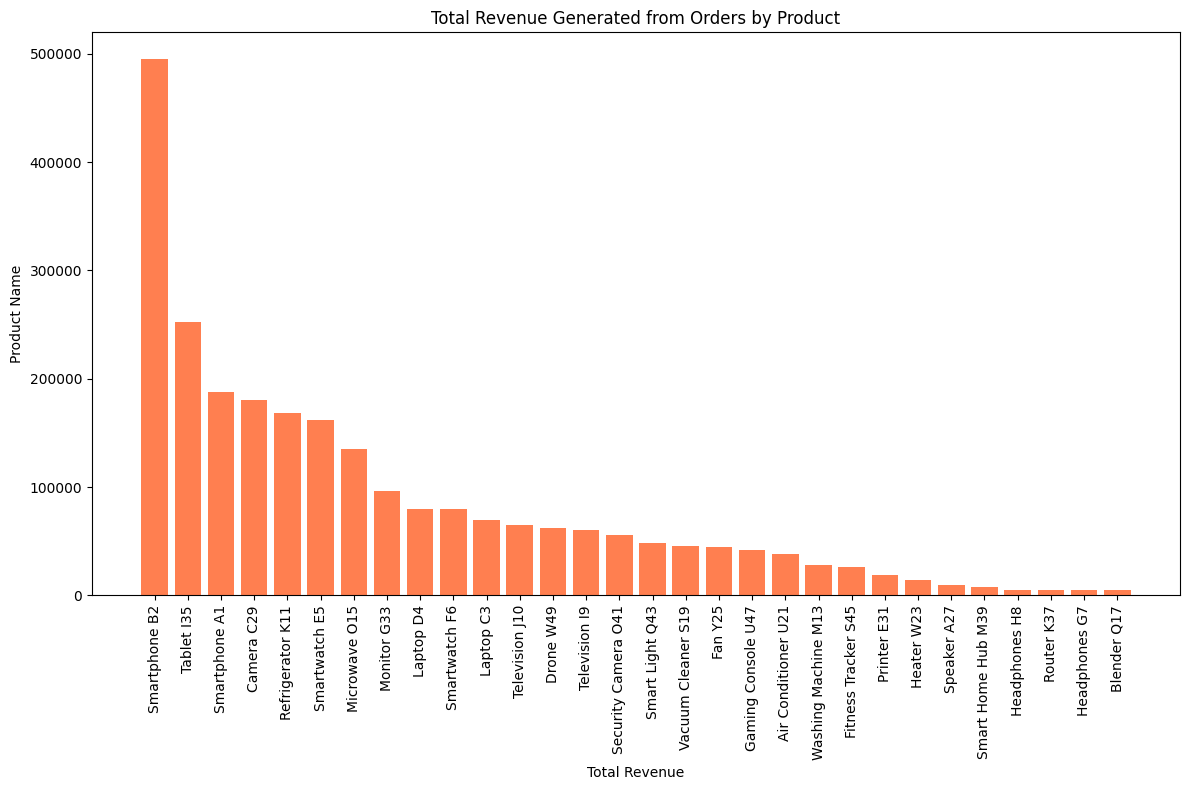

In [72]:
query = """
SELECT 
    product_id,
    SUM(quantity * total_price) AS total_revenue
FROM 
    order_details
GROUP BY 
    product_id
ORDER BY 
    total_revenue DESC;
"""

# Fetch the data into a DataFrame
df_revenue = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Load product names for better readability (assuming a products table exists)
product_names_query = """
SELECT
    product_id,
    product_name
FROM
    product;
"""

# Fetch the product names
df_product_names = pd.read_sql(product_names_query, conn)

# Merge product names with revenue data
df_revenue = df_revenue.merge(df_product_names, on='product_id')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(df_revenue['product_name'], df_revenue['total_revenue'], color='coral')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.xticks(rotation = 90)
plt.title('Total Revenue Generated from Orders by Product')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2900063872.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenue_by_category = pd.read_sql(query, conn)


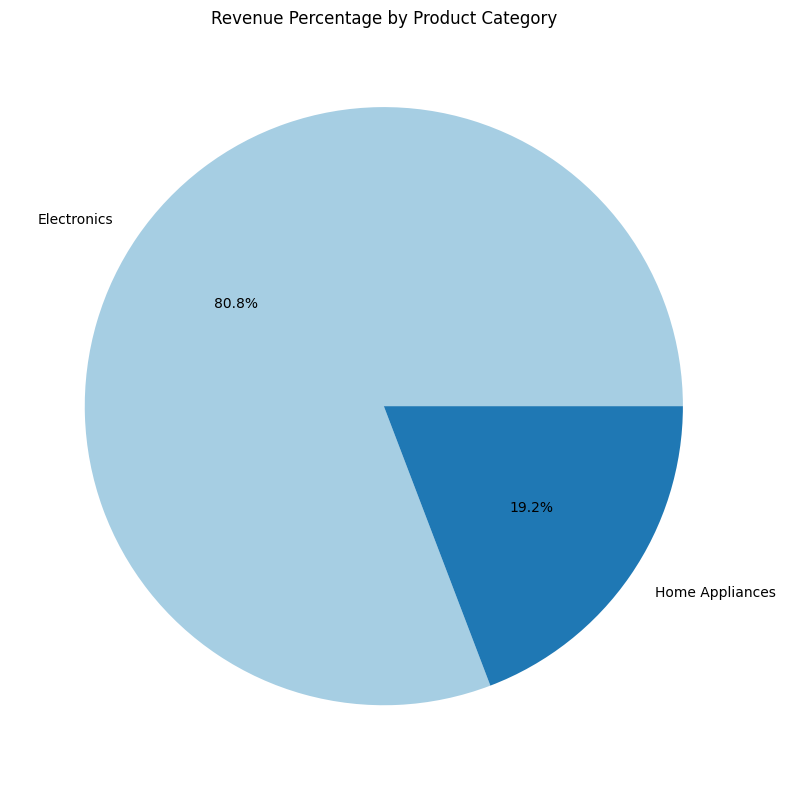

In [73]:
query = """
SELECT 
    p.category AS category,
    SUM(od.quantity * od.total_price) AS total_revenue
FROM 
    order_details od
JOIN 
    product p ON od.product_id = p.product_id
GROUP BY 
    p.category
ORDER BY 
    total_revenue DESC;
"""

# Fetch the data into a DataFrame
df_revenue_by_category = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Calculate the total revenue
total_revenue = df_revenue_by_category['total_revenue'].sum()

# Calculate the percentage for each category
df_revenue_by_category['percentage'] = (df_revenue_by_category['total_revenue'] / total_revenue) * 100

# Plot
plt.figure(figsize=(10, 8))
plt.pie(df_revenue_by_category['percentage'], labels=df_revenue_by_category['category'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(df_revenue_by_category))))
plt.title('Revenue Percentage by Product Category')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2607807431.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


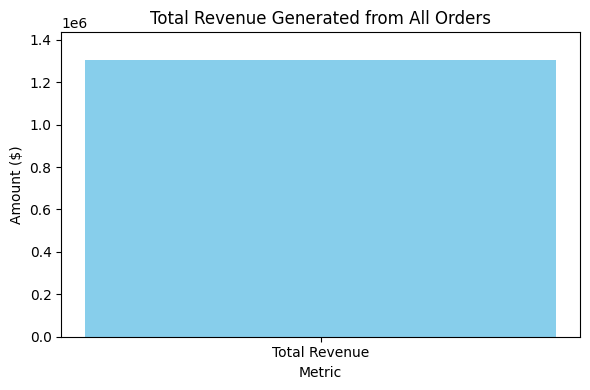

In [74]:
query = """
SELECT SUM(total_price) AS total_revenue
FROM order_details;
"""

# Execute the query and fetch the result
df = pd.read_sql(query, conn)
total_revenue = df['total_revenue'][0]

# Close the connection
# conn.close()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Amount ($)')
plt.title('Total Revenue Generated from All Orders')
plt.ylim(0, total_revenue * 1.1) 
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\4074983695.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_profitable =  pd.read_sql(query, conn)
C:\Users\khush\AppData\Local\Temp\ipykernel_3888\4074983695.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product_names = pd.read_sql(product_names_query, conn)


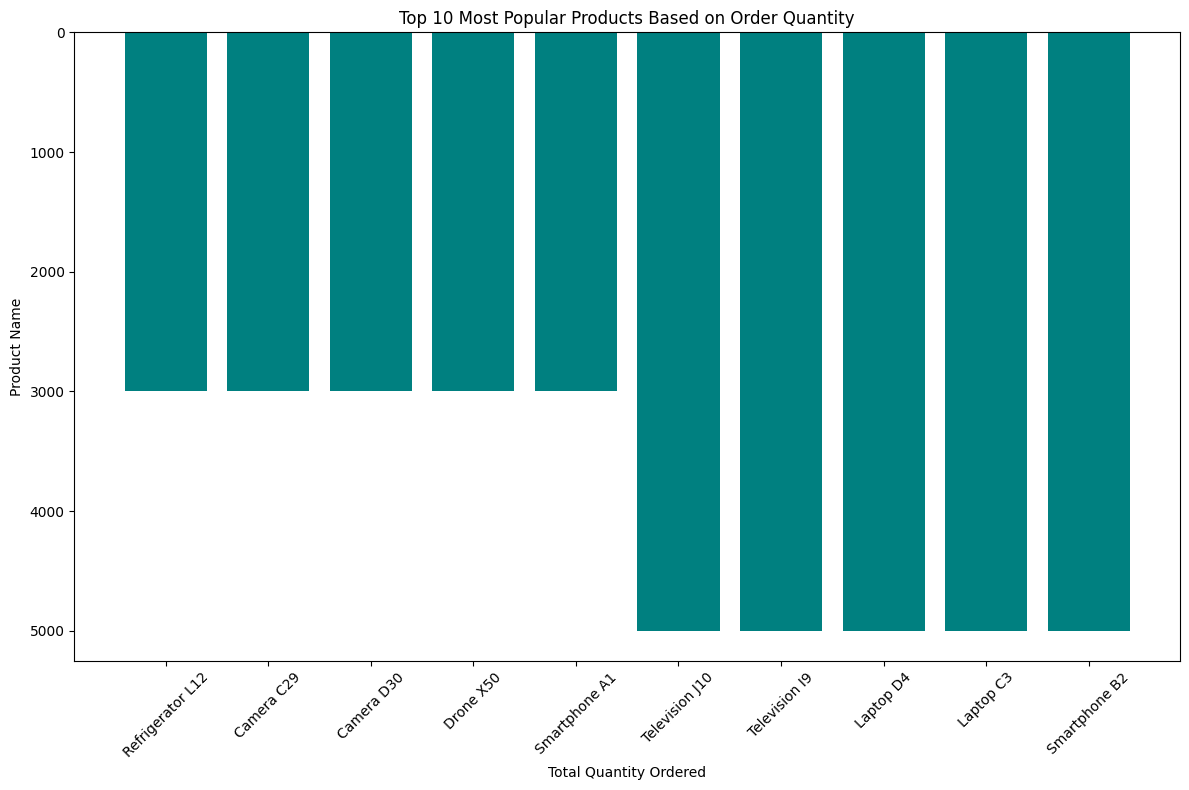

In [75]:
# Identify the most profitable products based on the difference between original and selling prices.

query = """
select 
    product_id, (original_price-selling_price) as profit
from
    product
order by
    profit desc
limit 10;
"""
df_profitable =  pd.read_sql(query, conn)

product_names_query = """
select
    product_id,
    product_name
from
    product;
"""
df_product_names = pd.read_sql(product_names_query, conn)
df_profitable = df_profitable.merge(df_product_names, on = 'product_id')

plt.figure(figsize=(12, 8))
plt.bar(df_profitable['product_name'], df_profitable['profit'], color='teal')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.xticks(rotation = 45)
plt.title('Top 10 Most Popular Products Based on Order Quantity')
plt.gca().invert_xaxis() 
plt.gca().invert_yaxis()
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\khush\AppData\Local\Temp\ipykernel_3888\447922410.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  highest_quantity_df = pd.read_sql(highest_quantity_query, conn)
C:\Users\khush\AppData\Local\Temp\ipykernel_3888\447922410.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  lowest_quantity_df = pd.read_sql(lowest_quantity_query, conn)


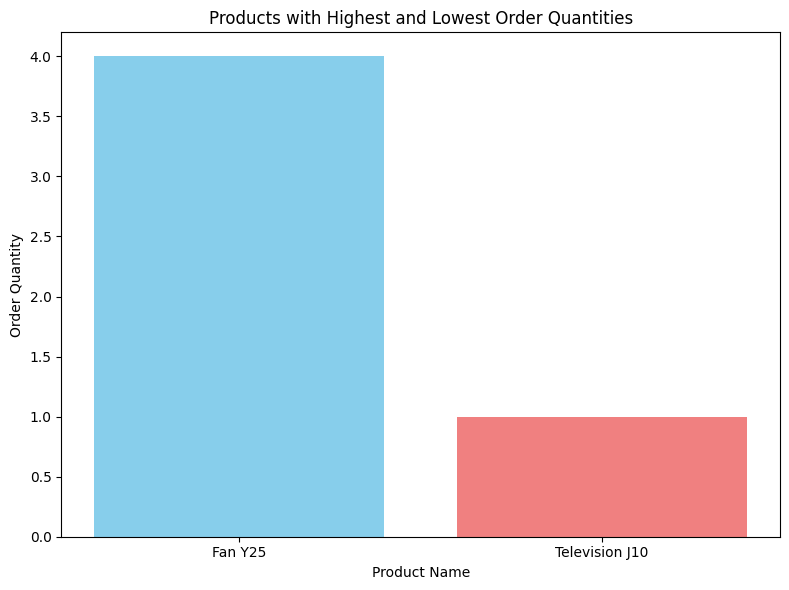

In [76]:
highest_quantity_query = """
SELECT 
    p.product_name,
    SUM(od.quantity) AS total_quantity
FROM 
    product p
JOIN 
    order_details od
ON 
    p.product_id = od.product_id
GROUP BY 
    p.product_name
ORDER BY 
    total_quantity DESC
LIMIT 1;
"""

# Query for the product with the lowest order quantity
lowest_quantity_query = """
SELECT 
    p.product_name,
    SUM(od.quantity) AS total_quantity
FROM 
    product p
JOIN 
    order_details od
ON 
    p.product_id = od.product_id
GROUP BY 
    p.product_name
ORDER BY 
    total_quantity ASC
LIMIT 1;
"""

# Execute the queries and fetch the results
highest_quantity_df = pd.read_sql(highest_quantity_query, conn)
lowest_quantity_df = pd.read_sql(lowest_quantity_query, conn)

# Combine the data for plotting
combined_df = pd.concat([highest_quantity_df, lowest_quantity_df], ignore_index=True)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(combined_df['product_name'], combined_df['total_quantity'], color=['skyblue', 'lightcoral'])
plt.ylabel('Order Quantity')
plt.xlabel('Product Name')
plt.title('Products with Highest and Lowest Order Quantities')
plt.tight_layout()

# Show the plot
plt.show()

# Close the connection
# conn.close()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\515172078.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  highest_quantity_df = pd.read_sql(highest_quantity_query, conn)
C:\Users\khush\AppData\Local\Temp\ipykernel_3888\515172078.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  lowest_quantity_df = pd.read_sql(lowest_quantity_query, conn)


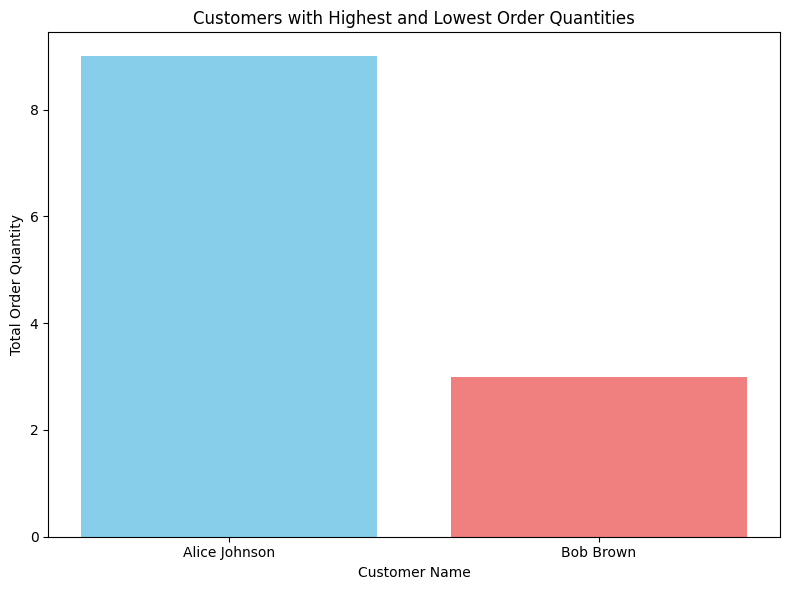

In [77]:
highest_quantity_query = """
SELECT 
    c.name,
    SUM(od.quantity) AS total_quantity
FROM 
    customer c
JOIN 
    order_details od
ON 
    c.customer_id = od.customer_id
GROUP BY 
    c.name
ORDER BY 
    total_quantity DESC
LIMIT 1;
"""

# Query for the customer with the lowest order quantity
lowest_quantity_query = """
SELECT 
    c.name,
    SUM(od.quantity) AS total_quantity
FROM 
    customer c
JOIN 
    order_details od
ON 
    c.customer_id = od.customer_id
GROUP BY 
    c.name
ORDER BY 
    total_quantity ASC
LIMIT 1;
"""

# Fetch the data into DataFrames
highest_quantity_df = pd.read_sql(highest_quantity_query, conn)
lowest_quantity_df = pd.read_sql(lowest_quantity_query, conn)

# Combine the data for plotting
combined_df = pd.concat([highest_quantity_df, lowest_quantity_df], ignore_index=True)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(combined_df['name'], combined_df['total_quantity'], color=['skyblue', 'lightcoral'])
plt.ylabel('Total Order Quantity')
plt.xlabel('Customer Name')
plt.title('Customers with Highest and Lowest Order Quantities')
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\khush\AppData\Local\Temp\ipykernel_3888\867620002.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_payment_modes = pd.read_sql(query, conn)


       payment_mode  count
0       Credit Card     13
1            PayPal      7
2        Debit Card      6
3  Cash on Delivery      4


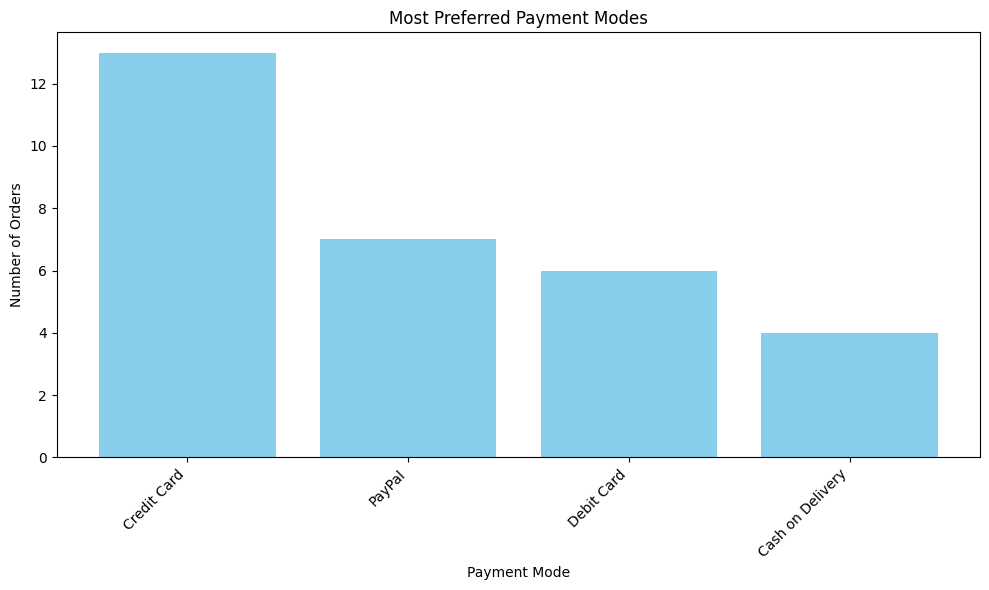

In [78]:
query = """
SELECT 
    payment_mode, 
    COUNT(*) AS count
FROM 
    order_details
GROUP BY 
    payment_mode
ORDER BY 
    count DESC;
"""

# Fetch the data into a DataFrame
df_payment_modes = pd.read_sql(query, conn)
print(df_payment_modes)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df_payment_modes['payment_mode'], df_payment_modes['count'], color='skyblue')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\3623485688.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_monthly_sales = pd.read_sql(query, conn)


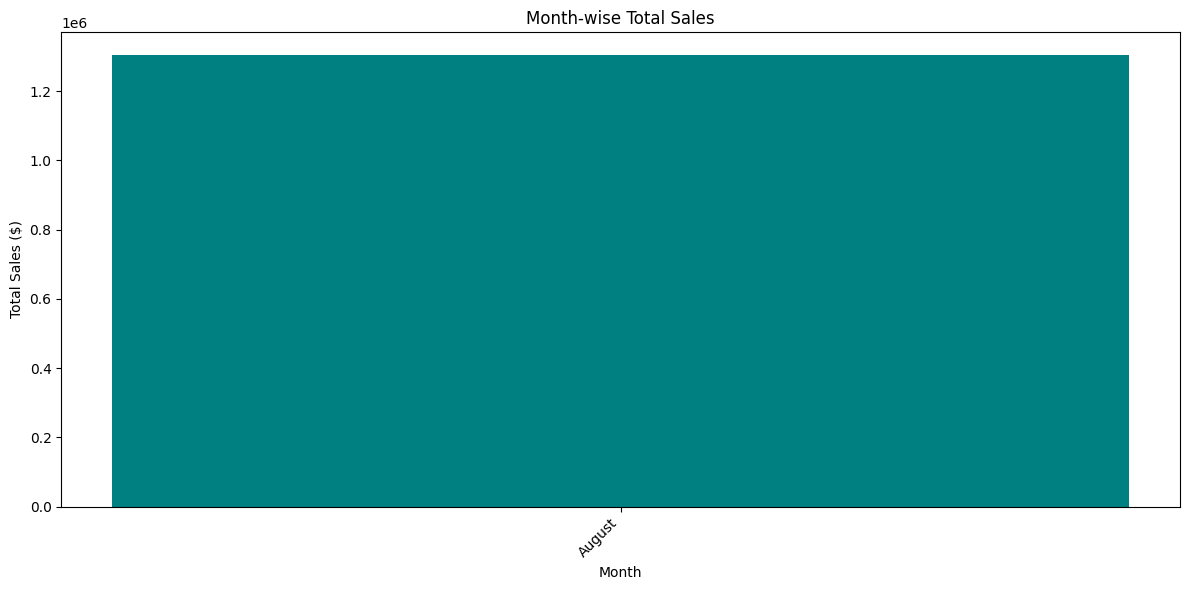

In [79]:
query = """
SELECT 
    DATE_FORMAT(order_date, '%Y-%m') AS order_month,
    DATE_FORMAT(order_date, '%M') AS month_name,
    SUM(total_price) AS total_sales
FROM 
    order_details
GROUP BY 
    order_month, month_name
ORDER BY 
    order_month;
"""

# Fetch the data into a DataFrame
df_monthly_sales = pd.read_sql(query, conn)


# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(df_monthly_sales['month_name'], df_monthly_sales['total_sales'], color='teal')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\3247273957.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_monthly_sales = pd.read_sql(query, conn)


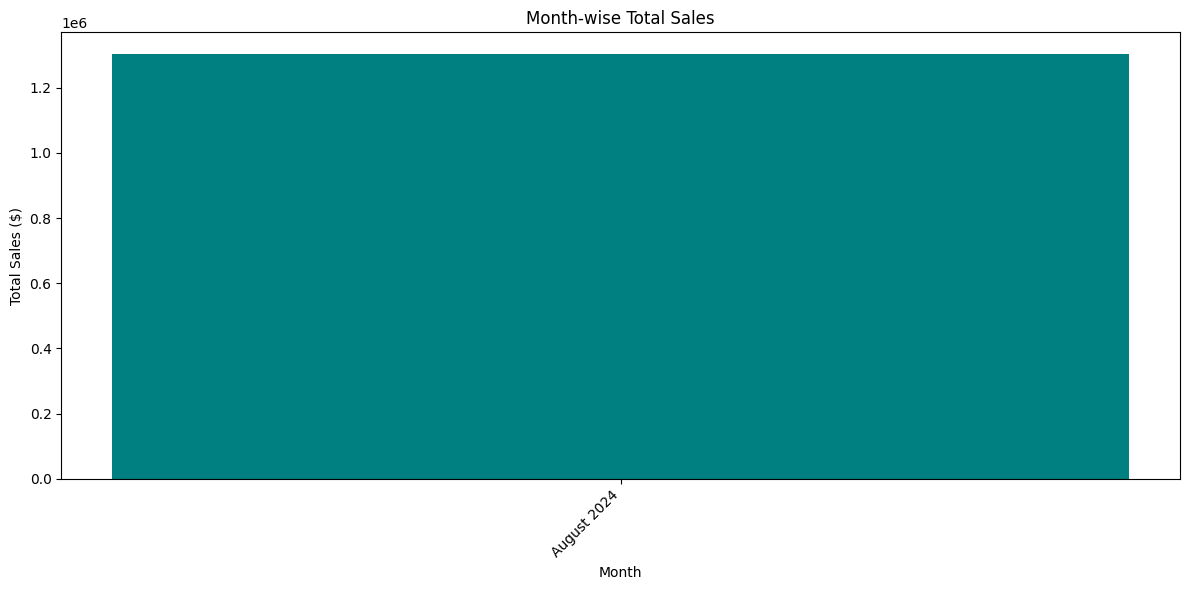

In [80]:
query = """
SELECT 
    DATE_FORMAT(order_date, '%Y-%m') AS order_month,
    DATE_FORMAT(order_date, '%M %Y') AS month_year_name,
    SUM(total_price) AS total_sales
FROM 
    order_details
GROUP BY 
    order_month, month_year_name
ORDER BY 
    order_month;
"""

# Fetch the data into a DataFrame
df_monthly_sales = pd.read_sql(query, conn)


# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(df_monthly_sales['month_year_name'], df_monthly_sales['total_sales'], color='teal')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\1312880236.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_by_date = pd.read_sql(query, conn)


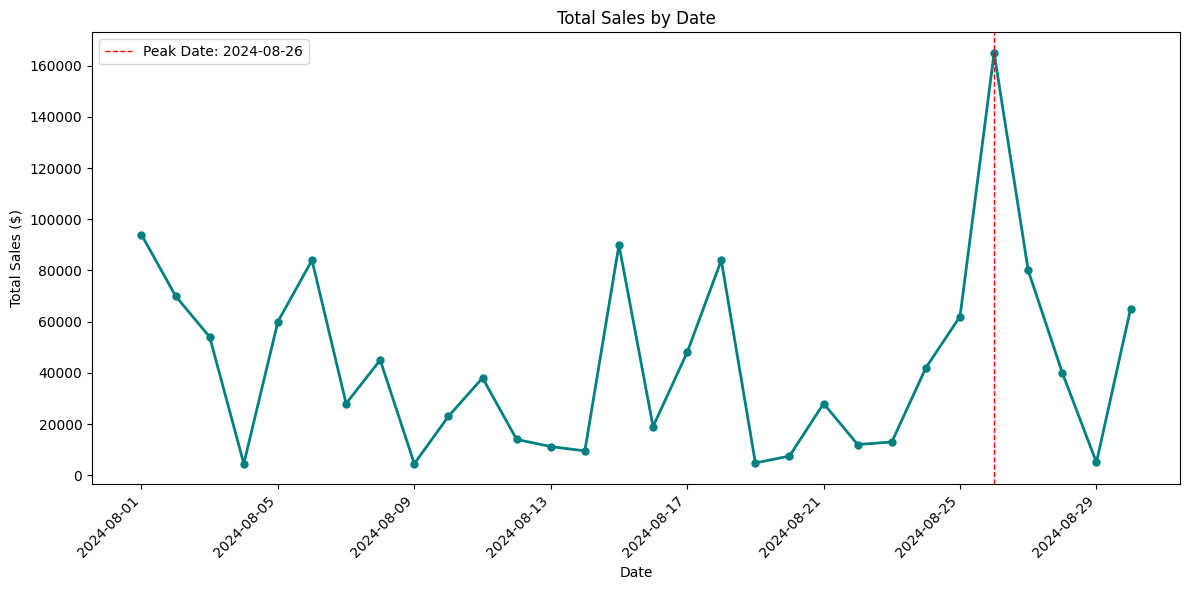

In [81]:
query = """
SELECT 
    DATE(order_date) AS order_date,
    SUM(total_price) AS total_sales
FROM 
    order_details
GROUP BY 
    DATE(order_date)
ORDER BY 
    order_date;
"""

# Fetch the data into a DataFrame
df_sales_by_date = pd.read_sql(query, conn)

# Find the peak order date
peak_date = df_sales_by_date.loc[df_sales_by_date['total_sales'].idxmax()]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_sales_by_date['order_date'], df_sales_by_date['total_sales'], marker='o', color='teal', linestyle='-', linewidth=2, markersize=5)
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Date')
plt.axvline(x=peak_date['order_date'], color='red', linestyle='--', linewidth=1, label=f'Peak Date: {peak_date["order_date"].strftime("%Y-%m-%d")}')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\3786114197.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_city_distribution = pd.read_sql(query, conn)


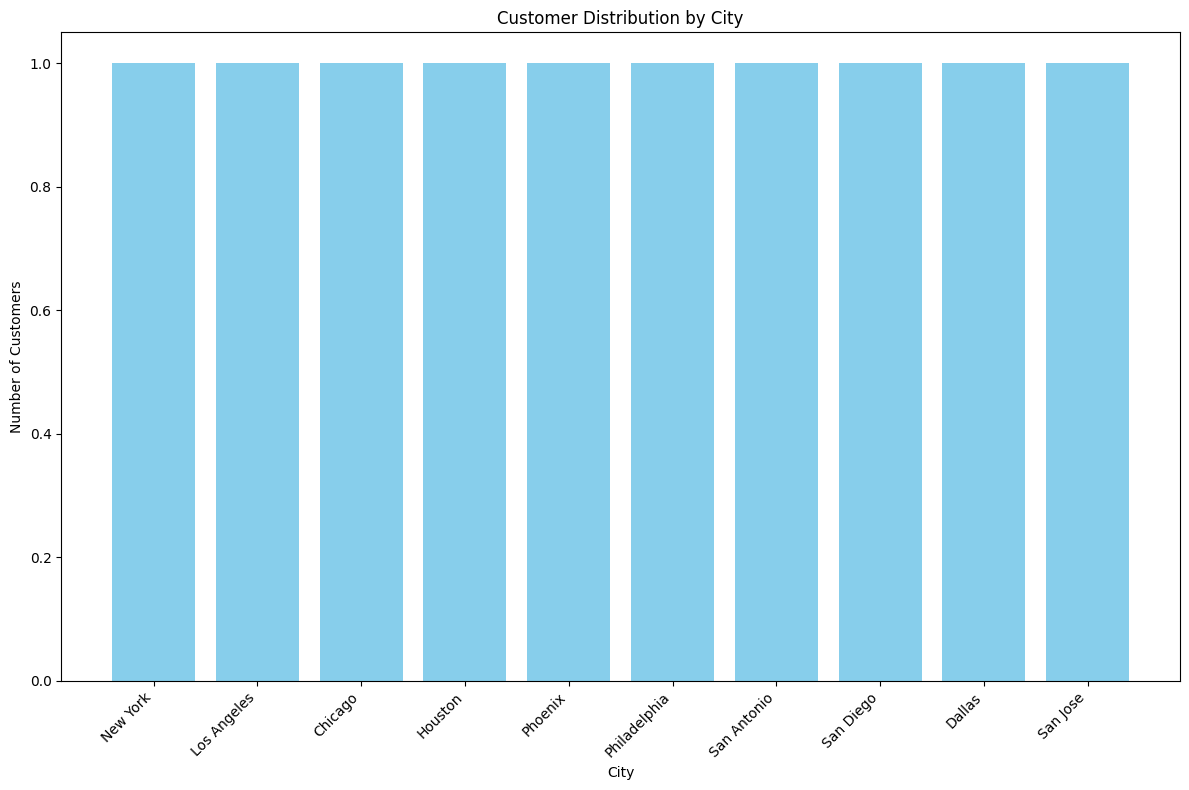

In [82]:
# customer distribution by city
query = """
SELECT 
    city,
    COUNT(*) AS number_of_customers
FROM 
    customer
GROUP BY 
    city
ORDER BY 
    number_of_customers DESC;
"""

# Fetch the data into a DataFrame
df_city_distribution = pd.read_sql(query, conn)

# Plot the distribution
plt.figure(figsize=(12, 8))
plt.bar(df_city_distribution['city'], df_city_distribution['number_of_customers'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2102647598.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_category = pd.read_sql(category_query, conn)


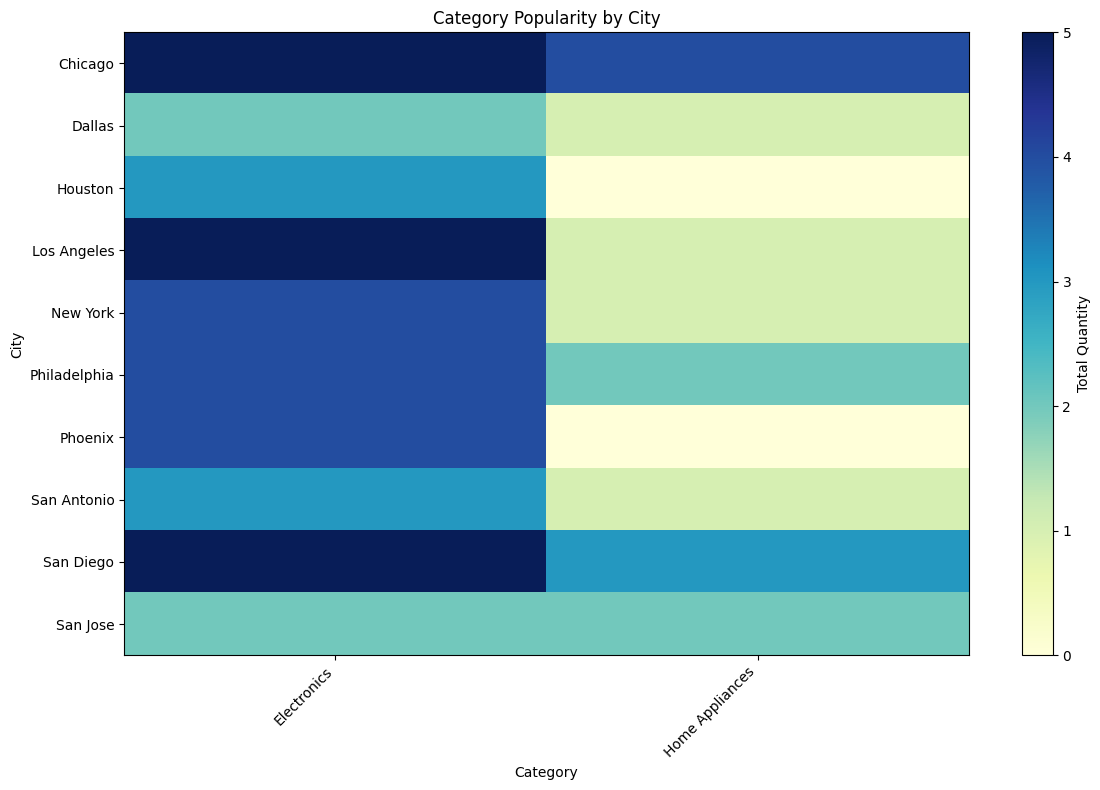

In [83]:
import numpy as np

category_query = """
SELECT
    c.city,
    p.category,
    SUM(od.quantity) AS total_quantity
FROM
    order_details od
JOIN
    product p ON od.product_id = p.product_id
JOIN
    customer c ON od.customer_id = c.customer_id
GROUP BY
    c.city, p.category;
"""

# Fetch data into DataFrames
# df_product = pd.read_sql(product_query, conn)
df_category = pd.read_sql(category_query, conn)

# Pivot data for heatmaps
# product_pivot = df_product.pivot_table(index='city', columns='product_name', values='total_quantity', aggfunc='sum', fill_value=0)
category_pivot = df_category.pivot_table(index='city', columns='category', values='total_quantity', aggfunc='sum', fill_value=0)

# Plot heatmap for category popularity by city
plt.figure(figsize=(12, 8))
plt.imshow(category_pivot, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Total Quantity')
plt.title('Category Popularity by City')
plt.xlabel('Category')
plt.ylabel('City')
plt.xticks(ticks=np.arange(len(category_pivot.columns)), labels=category_pivot.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(category_pivot.index)), labels=category_pivot.index)
plt.tight_layout()
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\76792284.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_best_selling = pd.read_sql(best_selling_query, conn)


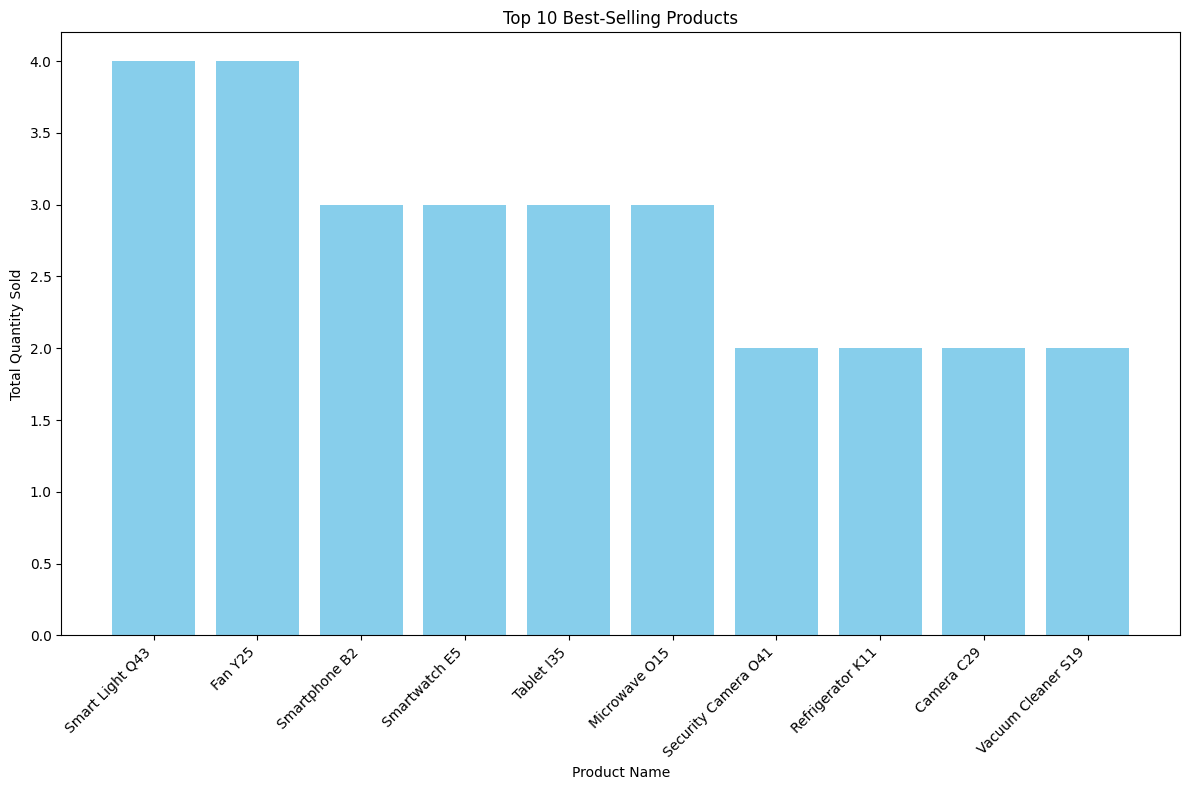

In [84]:
best_selling_query = """
SELECT
    p.product_name,
    SUM(od.quantity) AS total_quantity
FROM
    order_details od
JOIN
    product p ON od.product_id = p.product_id
GROUP BY
    p.product_name
ORDER BY
    total_quantity DESC
LIMIT 10;
"""

# Fetch data into a DataFrame
df_best_selling = pd.read_sql(best_selling_query, conn)

# Plotting the best-selling products
plt.figure(figsize=(12, 8))
plt.bar(df_best_selling['product_name'], df_best_selling['total_quantity'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2916395273.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_slow_moving = pd.read_sql(slow_moving_query, conn)


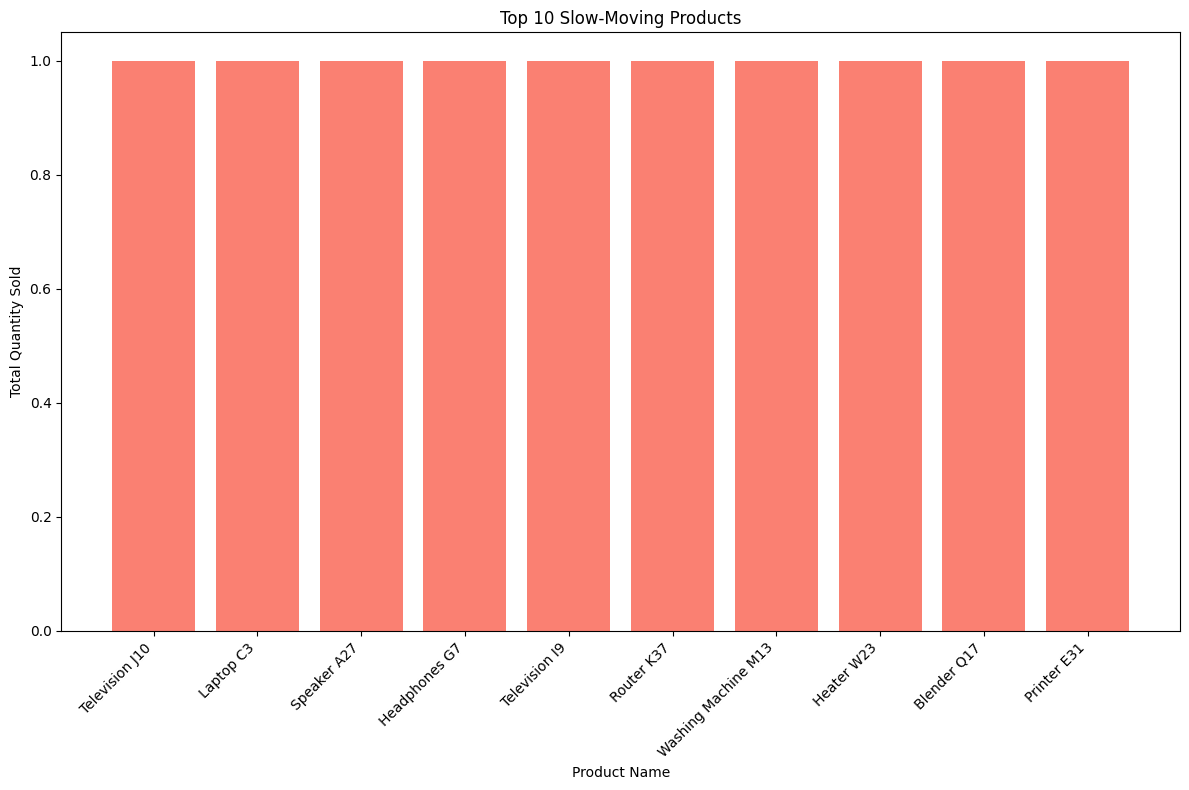

In [85]:
slow_moving_query = """
SELECT
    p.product_name,
    SUM(od.quantity) AS total_quantity
FROM
    order_details od
JOIN
    product p ON od.product_id = p.product_id
GROUP BY
    p.product_name
ORDER BY
    total_quantity ASC
LIMIT 10;
"""

# Fetch data into a DataFrame
df_slow_moving = pd.read_sql(slow_moving_query, conn)

# Plotting the slow-moving products
plt.figure(figsize=(12, 8))
plt.bar(df_slow_moving['product_name'], df_slow_moving['total_quantity'], color='salmon')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Slow-Moving Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_3888\2775614476.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_status = pd.read_sql(status_query, conn)


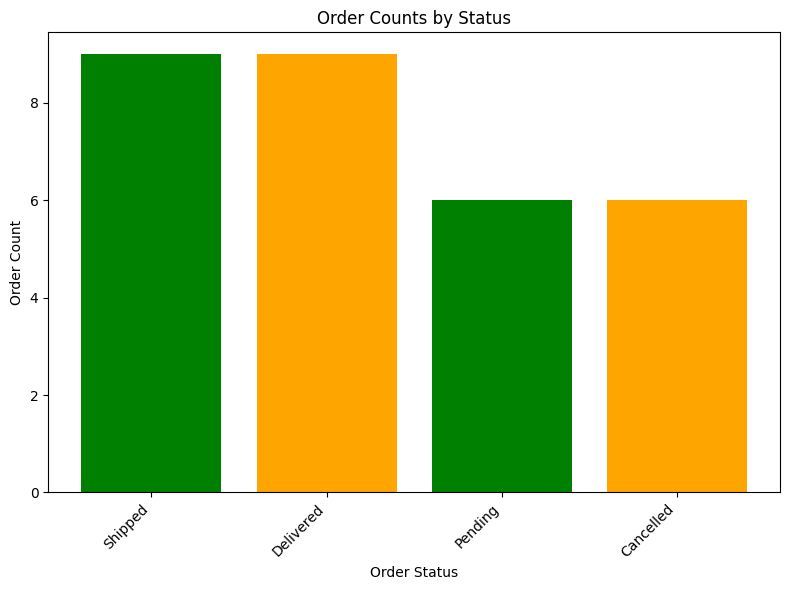

In [86]:
status_query = """
SELECT
    order_status,
    COUNT(*) AS order_count
FROM
    order_details
GROUP BY
    order_status;
"""

# Fetch data into a DataFrame
df_status = pd.read_sql(status_query, conn)

# Plotting the order counts by status
plt.figure(figsize=(8, 6))
plt.bar(df_status['order_status'], df_status['order_count'], color=['green', 'orange'])
plt.xlabel('Order Status')
plt.ylabel('Order Count')
plt.title('Order Counts by Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
